In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

%matplotlib inline
import seaborn as sns

shot = 95118

# 1.计算D气比例

## 读取质谱数据

In [11]:
mass_spec = pd.read_csv('../data/' + str(shot) + '.csv')
mass_spec


,time,2,3,4,18,20,28,32,40,71
0,0.734,0.000004,0.000010,0.000025,0.000004,0.000003,0.000003,0.000003,9.320000e-07,3.800000e-06
1,1.470,0.000007,0.000007,0.000024,0.000002,0.000003,0.000002,0.000001,1.160000e-06,1.980000e-06
2,2.200,0.000005,0.000009,0.000025,0.000003,0.000004,0.000004,0.000003,2.390000e-06,2.850000e-06
3,2.940,0.000007,0.000008,0.000024,0.000004,0.000003,0.000004,0.000004,3.170000e-06,9.390000e-07
4,3.660,0.000006,0.000010,0.000024,0.000004,0.000001,0.000006,0.000002,3.540000e-06,2.310000e-06
...,...,...,...,...,...,...,...,...,...,...
406,297.000,0.000008,0.000016,0.000040,0.000004,0.000002,0.000005,0.000003,5.340000e-06,3.020000e-06
407,298.000,0.000007,0.000012,0.000045,0.000003,0.000004,0.000003,0.000006,7.010000e-07,3.630000e-06
408,298.000,0.000009,0.000013,0.000040,0.000002,0.000001,0.000003,0.000002,2.610000e-06,3.400000e-06
409,299.000,0.000006,0.000012,0.000042,0.000003,0.000006,0.000003,0.000002,2.000000e-06,2.130000e-06


In [12]:
#TODO:
# 查找time值最接近59和300的下标
# 感觉没必要这么复杂，直接取59-300s的时间就可以了
idx_time_begin = np.abs(mass_spec['time'] - 59).idxmin()  # 寻找质谱中放电开始时间，通过绝对值减60秒，得到最接近开始放电时刻的记录值
idx_time_end = np.abs(mass_spec['time'] - 300).idxmin()  # 寻找质谱中放电终止时间，通过绝对值减70秒，得到最接近结束放电时刻的记录值
mass_spec_be = mass_spec.iloc[idx_time_begin:idx_time_end + 1]
DH = (mass_spec_be['4'] * 2 + mass_spec_be['3']) / ((mass_spec_be['2'] + mass_spec_be['3'] + mass_spec_be['4']) * 2)
timeDH = mass_spec_be.time - 60
P = np.polyfit(timeDH, DH, 5)

In [13]:
mass_spec_be.set_index('time')

,2,3,4,18,20,28,32,40,71
time,,,,,,,,,
59.1,0.000120,0.000473,0.002140,0.000040,0.000039,0.000005,0.000006,2.540000e-06,0.000003
59.8,0.000095,0.000372,0.001730,0.000034,0.000030,0.000006,0.000005,3.300000e-06,0.000003
60.5,0.000078,0.000348,0.001500,0.000032,0.000029,0.000007,0.000006,1.580000e-06,0.000005
61.3,0.000069,0.000287,0.001350,0.000025,0.000028,0.000004,0.000005,1.700000e-06,0.000002
62.0,0.000068,0.000259,0.001200,0.000021,0.000026,0.000006,0.000006,3.830000e-06,0.000002
...,...,...,...,...,...,...,...,...,...
297.0,0.000008,0.000016,0.000040,0.000004,0.000002,0.000005,0.000003,5.340000e-06,0.000003
298.0,0.000007,0.000012,0.000045,0.000003,0.000004,0.000003,0.000006,7.010000e-07,0.000004
298.0,0.000009,0.000013,0.000040,0.000002,0.000001,0.000003,0.000002,2.610000e-06,0.000003


In [17]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between `x` and `y` can be shown for different subsets
    of the data using the `hue`, `size`, and `style` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    `hue` and `style` for t

<AxesSubplot:xlabel='time'>

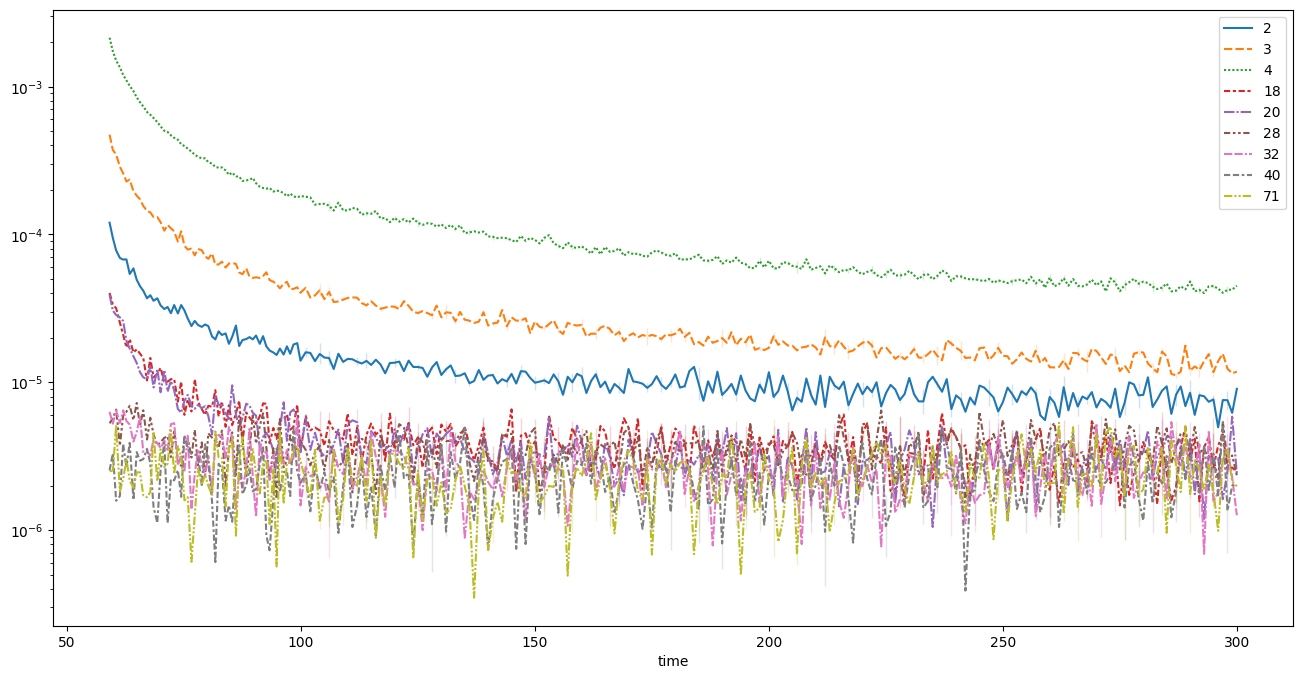

In [18]:
plt.figure(figsize=(16,8))
plt.yscale('log')
sns.lineplot(data=mass_spec_be.set_index('time'))

In [6]:
DH

80     0.869557
81     0.872257
82     0.869159
83     0.875286
84     0.870890
         ...   
406    0.757719
407    0.800442
408    0.754825
409    0.800700
410    0.773204
Length: 331, dtype: float64

In [7]:
timeDH

80      -0.9
81      -0.2
82       0.5
83       1.3
84       2.0
       ...  
406    237.0
407    238.0
408    238.0
409    239.0
410    240.0
Name: time, Length: 331, dtype: float64

In [8]:
P

array([-5.45855944e-13,  3.54168496e-10, -8.34576842e-08,  9.86506095e-06,
       -1.04527069e-03,  8.72810087e-01])

# 2.计算Q_puff

In [9]:
Pam2P = 2.41e20

# SMBI3充气罐子体积m3
V_SMBI = 2.0431e-4 if shot > 88344 else 39.8431e-4

#2021对稳压罐进行重组，取消KHG1，JHG6,JHG3仅用于充Ar

#用于加料的罐子
V_JHG1 = 3.118e-4  # PUFF系统充气罐体积m-3
V_DHG1 = 2.919E-4  # D窗口E低杂波天线充气罐体积m-3
V_JHG2 = 2.91e-4  # J窗口水平充气，位于偏滤器充气罐体积m-3
V_JHG4 = 2.99e-4  # N窗口北ICRF天线加料充气罐体积m-3
V_JHG5 = 2.997e-4  # N窗口南ICRF天线加料充气罐体积m-3
#V_KHG1=2.919E-4    # K窗口N低杂波天线充气罐体积m-3
#V_JHG6 = 2.949e-4  # J窗口南ICRF天线加料充气罐体积m-3

#用于偏滤器杂质气体充气
V_OUG1 = 1.4687e-3  # J窗口偏滤器充气罐体积m-3
V_ODG1 = 1.4601e-3  # J窗口偏滤器充气罐体积m-3
V_CDG1 = 6.792e-3  # J窗口偏滤器充气罐体积m-3
V_HDG1 = 6.75e-3  # J窗口偏滤器充气罐体积m-3

KH = 2.9  # 规管系数

In [10]:
import MDSplus

cn = MDSplus.Connection('mds.ipp.ac.cn')
cn.openTree('east', shot)

In [11]:
help(cn.get)

Help on method get in module MDSplus.connection:

get(exp, *args, **kwargs) method of MDSplus.connection.Connection instance
    Evaluate and expression on the remote server
    @param exp: TDI expression to be evaluated
    @type exp: str
    @param args: optional arguments to be inserted for the placeholders in the expression.
    @type args: Data
    @param kwargs: Used for internal purposes
    @return: result of evaluating the expression on the remote server
    @rtype: Scalar or Array



In [12]:
VJHpev3 = cn.get('\VJHpev3')

In [13]:
type(VJHpev3.data())

numpy.ndarray

In [14]:
G107 = 10 ** (1.667 * cn.get('\G107') - 9.333) * KH
G105 = 10 ** (1.667 * cn.get('\G105') - 9.333) * KH
G109 = 10 ** (1.667 * cn.get('\G109') - 9.333) * KH
G106 = 10 ** (1.667 * cn.get('\G106') - 9.333) * KH
VJHpev3 = cn.get('\VJHpev3')
time_VJHpev3 = cn.get('dim_of(\VJHpev3)')
index = np.where(VJHpev3 > 0.3)

M_GAS = np.floor(index[-1] / 10)  # 重采样之后的下标

In [15]:
index

(array([67945, 67946, 67947, ..., 89909, 89910, 89911], dtype=int64),)

In [16]:
# Convert mdsarray to np.array
# VJHpev3 = VJHpev3.data()

In [17]:
# 没必要写两遍
jhg1 = cn.get('\jhg1')
jhg2 = cn.get('\jhg2')
dhg1 = cn.get('\Dhg1')
jhg4 = cn.get('\jhg4')
jhg5 = cn.get('\jhg5')

JHG1 = (cn.get('\jhg1') - 1) * 2.5e4  # JHG1为充气信号，单位Pa
JHG2 = (cn.get('\jhg2') - 1) * 2.5e4  #
DHG1 = (cn.get('\Dhg1') - 1) * 2.5e4  # D窗口低杂波天线充气
JHG4 = (cn.get('\jhg4') - 1) * 2.5e4  # B窗口北ICRF天线加料
JHG5 = (cn.get('\jhg5') - 1) * 2.5e4  # J窗口南ICRF天线加料

#缩短数据长度
JHG1 = JHG1[::10]
JHG2 = JHG2[::10]
DHG1 = DHG1[::10]
JHG4 = JHG4[::10]
JHG5 = JHG5[::10]

In [18]:
#偏滤器加料
oug1 = cn.get('\OUG1')
odg1 = cn.get('\ODG1')
cdg1 = cn.get('\CDG1')
hdg1 = cn.get('\HDG1')
OUG1 = (cn.get('\OUG1') - 1) * 2.5e4  # J窗口偏滤器
ODG1 = (cn.get('\ODG1') - 1) * 2.5e4  # J窗口偏滤器
CDG1 = (cn.get('\CDG1') - 1) * 2.5e4  # J窗口偏滤器
HDG1 = (cn.get('\HDG1') - 1) * 2.5e4  # J窗口偏滤器
#缩短数据长度
OUG1 = OUG1[::10]
ODG1 = ODG1[::10]
CDG1 = CDG1[::10]
HDG1 = HDG1[::10]

NBI1LHI = 0.8 * (cn.get('\\NBI1LHI'))  # NBI 注入电流信号，以\N是有特殊含义的字符,加上转义字符\
NBI1RHI = 0.8 * (cn.get('\\NBI1RHI'))
NBI2LHI = 0.8 * (cn.get('\\NBI2LHI'))
NBI2RHI = 0.8 * (cn.get('\\NBI2RHI'))
time_NBI = cn.get('dim_of(\\NBI2RHI)')

#缩短数据长度
G107 = G107[::10]
G105 = G105[::10]
G109 = G109[::10]
G106 = G106[::10]

In [19]:
ipm = cn.get('\ipm')
time = cn.get('dim_of(\G107)')
time = time[::10]
time1 = cn.get('dim_of(\ipm)')
time1 = time1[::10]
length_time1 = len(time)
length_time2 = len(time1)
time_puffing = cn.get('dim_of(\jhg1)')
length_timepuffing = len(time_puffing)

background = np.mean(G107[:100])
G107 = G107 - background

# 充气部分

## LHW部分

In [20]:
background_DHG1 = np.mean(DHG1[:5000])
if max(dhg1)-min(dhg1)<0.3:
    DHG1=np.zeros([length_time1,1])
    puff_DHG=V_DHG1 * DHG1
else:
    for j in range(length_time1):
        puff_DHG[j]= V_DHG1*(background_DHG1-DHG1(j))

# puff_DHG
puff_LHW=puff_DHG
puff_LHW=smooth(puff_LHW,1000,'sgolay');
[M_LHW,N_LHW]=find(puff_LHW==max(puff_LHW));
M_LHW=min(M_LHW);
if length(M_LHW)>10
    puff_LHWlong=puff_LHW;
else
puff_LHWlong(1:1:M_LHW,1)=puff_LHW(1:1:M_LHW,1);
puff_LHWlong((M_LHW+1):1:length_time1,1)=ones(length_time1-M_LHW,1)*puff_LHW(M_LHW,1);
end
puff_LHWlong=smooth(puff_LHWlong,100,'sgolay');

SyntaxError: invalid syntax (2073343074.py, line 14)